## Вторая часть отчета

In [19]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Построим перцептрон с кастомным оптимизатором и категориальной кросс-энтропией в качестве лосса

In [20]:
class Perceptron:
    def __init__(self, input_size, num_classes):
        self.W = np.random.randn(input_size, num_classes)
        self.b = np.zeros((1, num_classes))

    def forward(self, X):
        logits = np.dot(X, self.W) + self.b
        return logits

    def predict(self, X):
        logits = self.forward(X)
        probs = self.softmax(logits)
        return np.argmax(probs, axis=1)

    def softmax(self, logits):
        exps = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)


Проверим работу наших оптимизаторов

In [21]:
from optimayzers import *

input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = Perceptron(input_size, num_classes)

bfgs_optimizer(model, X_train, y_train, num_iters=100)
accuracy_score(model.predict(X_test), y_test)

0.3333333333333333

In [22]:
model1 = Perceptron(input_size, num_classes)
lbfgs_optimizer(model1, X_train, y_train, num_iters=100)
accuracy_score(model1.predict(X_test), y_test)

0.3

In [23]:
model2 = Perceptron(input_size, num_classes)
adam_optimizer(model2, X_train, y_train, num_iters=100)
accuracy_score(model2.predict(X_test), y_test)

0.9333333333333333

Построим графики зависимостей качества моделей от числа итераций оптимизатора

In [24]:
iteration_list = list(range(100, 301, 10))

results_bfgs = {'iterations': [], 'loss': [], 'time': [], 'accuracy': []}
results_lbfgs = {'iterations': [], 'loss': [], 'time': [], 'accuracy': []}
results_adam = {'iterations': [], 'loss': [], 'time': [], 'accuracy': []}

input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))


for num_iters in iteration_list:
    print(f'\nКоличество итераций: {num_iters}')

    # BFGS
    model_bfgs = Perceptron(input_size, num_classes)
    final_loss_bfgs, total_time_bfgs = bfgs_optimizer(model_bfgs, X_train, y_train, num_iters=num_iters)
    y_pred_bfgs = model_bfgs.predict(X_test)
    accuracy_bfgs = accuracy_score(y_test, y_pred_bfgs)

    results_bfgs['iterations'].append(num_iters)
    results_bfgs['loss'].append(final_loss_bfgs)
    results_bfgs['time'].append(total_time_bfgs)
    results_bfgs['accuracy'].append(accuracy_bfgs)

    # L-BFGS
    model_lbfgs = Perceptron(input_size, num_classes)
    final_loss_lbfgs, total_time_lbfgs = lbfgs_optimizer(model_lbfgs, X_train, y_train, num_iters=num_iters)
    y_pred_lbfgs = model_lbfgs.predict(X_test)
    accuracy_lbfgs = accuracy_score(y_test, y_pred_lbfgs)

    results_lbfgs['iterations'].append(num_iters)
    results_lbfgs['loss'].append(final_loss_lbfgs)
    results_lbfgs['time'].append(total_time_lbfgs)
    results_lbfgs['accuracy'].append(accuracy_lbfgs)

    # Adam
    model_adam = Perceptron(input_size, num_classes)
    final_loss_adam, total_time_adam = adam_optimizer(model_adam, X_train, y_train, num_iters=num_iters, learning_rate=0.01)
    y_pred_adam = model_adam.predict(X_test)
    accuracy_adam = accuracy_score(y_test, y_pred_adam)

    results_adam['iterations'].append(num_iters)
    results_adam['loss'].append(final_loss_adam)
    results_adam['time'].append(total_time_adam)
    results_adam['accuracy'].append(accuracy_adam)

    print(f'BFGS - Потери: {final_loss_bfgs:.4f}, Время: {total_time_bfgs:.2f} сек, Точность: {accuracy_bfgs*100:.2f}%')
    print(f'L-BFGS - Потери: {final_loss_lbfgs:.4f}, Время: {total_time_lbfgs:.2f} сек, Точность: {accuracy_lbfgs*100:.2f}%')
    print(f'Adam - Потери: {final_loss_adam:.4f}, Время: {total_time_adam:.2f} сек, Точность: {accuracy_adam*100:.2f}%')



Количество итераций: 100
BFGS - Потери: 1.3904, Время: 0.45 сек, Точность: 30.00%
L-BFGS - Потери: 1.3089, Время: 0.20 сек, Точность: 40.00%
Adam - Потери: 0.5863, Время: 0.15 сек, Точность: 90.00%

Количество итераций: 110
BFGS - Потери: 1.3322, Время: 0.36 сек, Точность: 26.67%
L-BFGS - Потери: 0.7079, Время: 0.20 сек, Точность: 86.67%
Adam - Потери: 0.3254, Время: 0.17 сек, Точность: 93.33%

Количество итераций: 120
BFGS - Потери: 0.5546, Время: 0.39 сек, Точность: 70.00%
L-BFGS - Потери: 1.3706, Время: 0.22 сек, Точность: 16.67%
Adam - Потери: 0.2548, Время: 0.20 сек, Точность: 93.33%

Количество итераций: 130
BFGS - Потери: 0.9466, Время: 0.44 сек, Точность: 43.33%
L-BFGS - Потери: 0.9485, Время: 0.25 сек, Точность: 46.67%
Adam - Потери: 0.3411, Время: 0.20 сек, Точность: 96.67%

Количество итераций: 140
BFGS - Потери: 0.6037, Время: 0.46 сек, Точность: 73.33%
L-BFGS - Потери: 0.5524, Время: 0.26 сек, Точность: 93.33%
Adam - Потери: 0.3449, Время: 0.24 сек, Точность: 96.67%

Коли

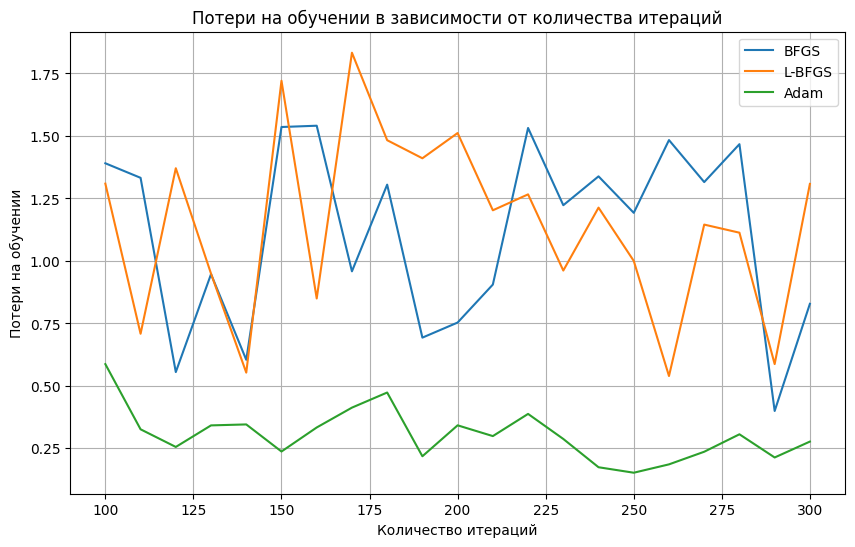

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(results_bfgs['iterations'], results_bfgs['loss'], label='BFGS')
plt.plot(results_lbfgs['iterations'], results_lbfgs['loss'], label='L-BFGS')
plt.plot(results_adam['iterations'], results_adam['loss'], label='Adam')
plt.xlabel('Количество итераций')
plt.ylabel('Потери на обучении')
plt.title('Потери на обучении в зависимости от количества итераций')
plt.legend()
plt.grid(True)
plt.show()


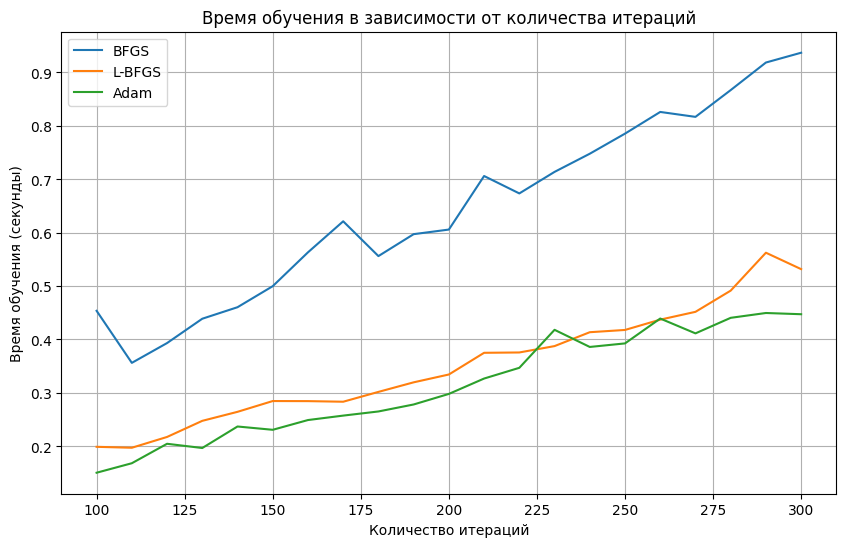

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(results_bfgs['iterations'], results_bfgs['time'], label='BFGS')
plt.plot(results_lbfgs['iterations'], results_lbfgs['time'], label='L-BFGS')
plt.plot(results_adam['iterations'], results_adam['time'], label='Adam')
plt.xlabel('Количество итераций')
plt.ylabel('Время обучения (секунды)')
plt.title('Время обучения в зависимости от количества итераций')
plt.legend()
plt.grid(True)
plt.show()


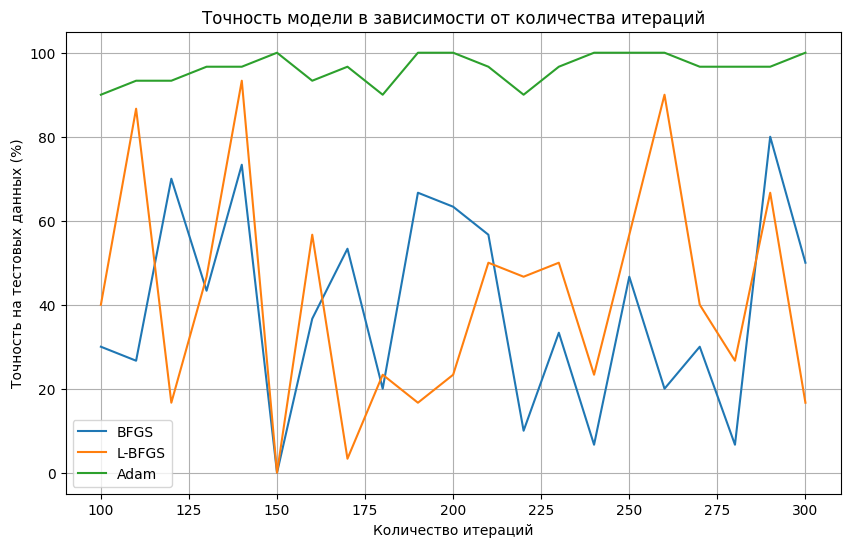

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(results_bfgs['iterations'], [acc * 100 for acc in results_bfgs['accuracy']], label='BFGS')
plt.plot(results_lbfgs['iterations'], [acc * 100 for acc in results_lbfgs['accuracy']], label='L-BFGS')
plt.plot(results_adam['iterations'], [acc * 100 for acc in results_adam['accuracy']], label='Adam')
plt.xlabel('Количество итераций')
plt.ylabel('Точность на тестовых данных (%)')
plt.title('Точность модели в зависимости от количества итераций')
plt.legend()
plt.grid(True)
plt.show()


Оптимизатор Adam на порядок превосходит остальных "коллег". Время обучения ниже, качество - лучше. Это достигается благодаря комбинации идей первого и второго моментов. 